# importation my packages which i need in my project

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#\/ i want this package because it permit me to replace automatically my DataFramme to boolean 
from sklearn.preprocessing import LabelEncoder 
#\/ i want this package because after i will do a mapping betwenn my project and a interface web
import pickle
#\/ this importation permit to depare my dataFrame in two dataFrame , trainning and test
from sklearn.model_selection import StratifiedShuffleSplit
#\/# We will applicate three logisticals algorithmics Regression, KNN, DecisionTree for realisation of our model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("train.csv")

In [2]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
#command permt me to display all line in my dataFrame
pd.set_option('display.max_rows',df.shape[0]+1)

In [3]:
pd.set_option('display.max_rows',10)

In [3]:
#i want to see the sum of cell have a null value from all columns in my dataFrame
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# want to see the null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# i want to separete my date in two side, cat_data == the varchar and the num_data == the number values
cat_data =[]
num_data =[]
for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
#convert my list cat_dat[] to Dataframe
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [13]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [14]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [15]:
#now I want to replace null values by majority values for my cat_data
#this command "x.value_counts().index[0]" means ==> browse(x) me this dataframe and give me which value repetes the most (value_counts()),
#then replaces my null(fillna()) values by the value that repetes the most (index[0]) in my data frame 
cat_data=cat_data.apply(lambda x : x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [16]:
num_data.isnull().sum().sort_values(ascending=True)

ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
LoanAmount           22
Credit_History       50
dtype: int64

In [17]:
#now I want to replace null values by majority values for my num_data
num_data.fillna(method='bfill', inplace= True)
num_data.isnull().sum().any()

False

In [18]:
num_data.LoanAmount = num_data.LoanAmount.replace("bfill",128)
num_data.isnull().sum().any()

False

In [19]:
num_data.isnull().sum().sort_values(ascending=True)

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [21]:
cat_data.Loan_Status = cat_data.Loan_Status.replace("Y",1)
# cat_data.Loan_Status = cat_data.Loan_Status.astype(int)

In [22]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,1
4,LP001008,Male,No,0,Graduate,No,Urban,1
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,Urban,1


In [23]:
#this replace a specify columns 
cat_data.Loan_Status = cat_data.Loan_Status.replace("N",0)
cat_data.Loan_Status = cat_data.Loan_Status.replace("Y",1)

In [23]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,1
610,610,1,1,3,0,0,0,1
611,611,1,1,1,0,0,2,1
612,612,1,1,2,0,0,2,1


In [20]:
# now i want to replace my all dataframe value to number i means if yes = I, no = 0 all that like a boolean automaticaly
le = LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,1
610,610,1,1,3,0,0,0,1
611,611,1,1,1,0,0,2,1
612,612,1,1,2,0,0,2,1


In [21]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,1
610,610,1,1,3,0,0,0,1
611,611,1,1,1,0,0,2,1
612,612,1,1,2,0,0,2,1


In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
# merge my two DataFrame (cat_data and num_data)
fusion_data= pd.concat([cat_data,num_data], axis=1)

In [25]:
fusion_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0
3,3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0
4,4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0
610,610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0
611,611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0
612,612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0


In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
target_value={1:1,0:0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [37]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [55]:
fusion_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0
3,3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0
4,4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0
610,610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0
611,611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0
612,612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0


In [38]:
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [56]:
df = pd.concat([cat_data,num_data,target], axis = 1)

In [57]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


the loan percent according is : 0.3127035830618892
the loan percent not according is :: 0.6872964169381107


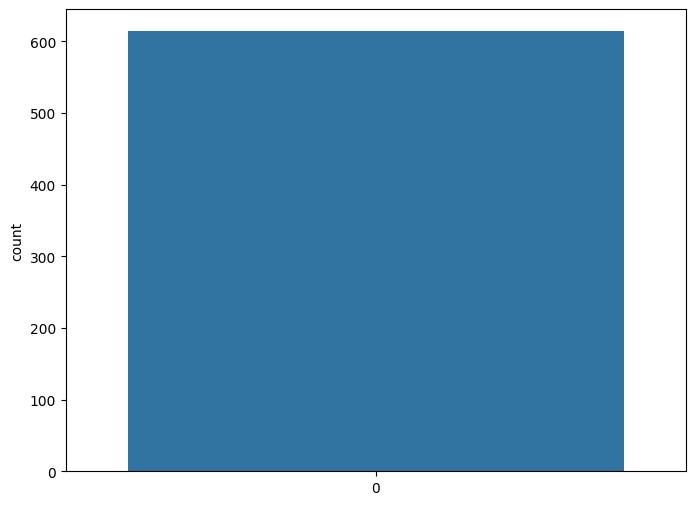

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'the loan percent according is : {yes}')
print(f'the loan percent not according is :: {no}')

C:\Users\mlkou\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


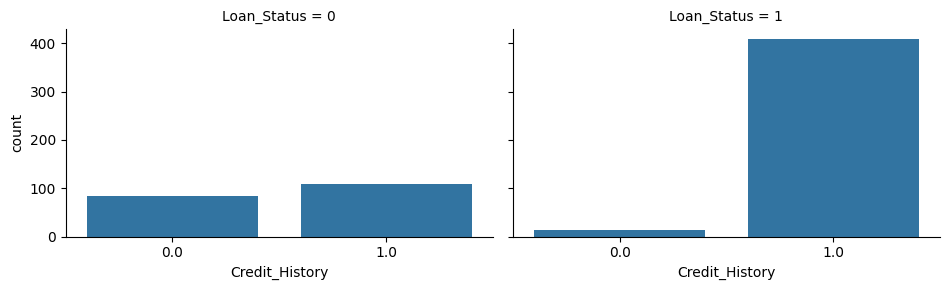

In [60]:
grid=sns.FacetGrid(df, col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,'Credit_History')

C:\Users\mlkou\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


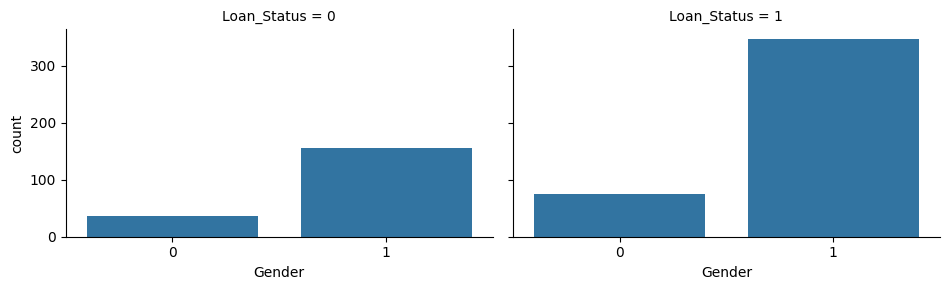

In [70]:
grid=sns.FacetGrid(df, col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,'Gender')

C:\Users\mlkou\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


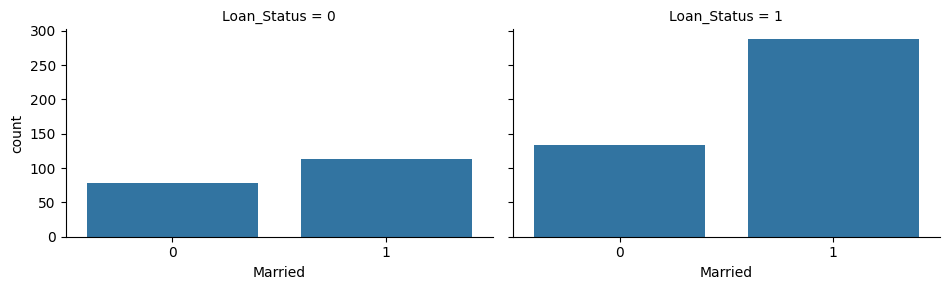

In [71]:
grid=sns.FacetGrid(df, col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,"Married")

C:\Users\mlkou\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


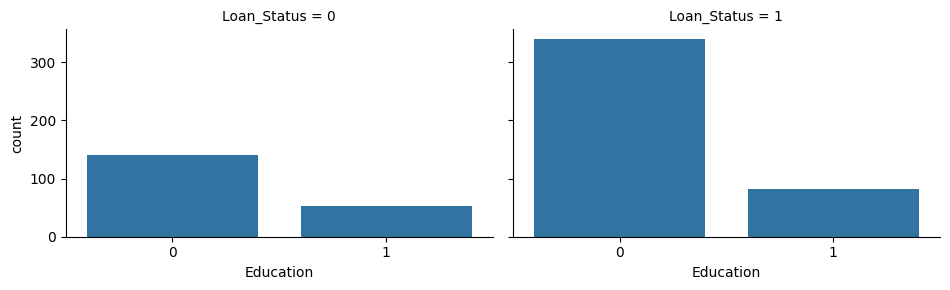

In [74]:
grid=sns.FacetGrid(df, col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,"Education")

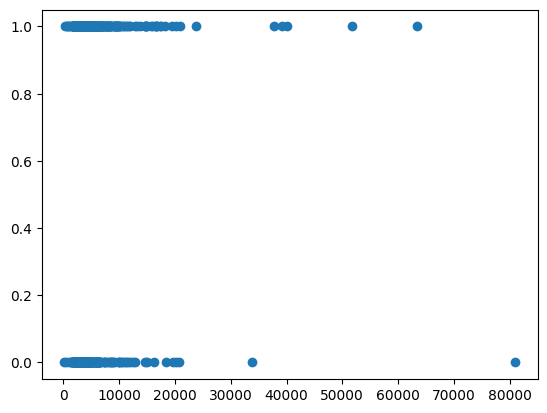

In [76]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

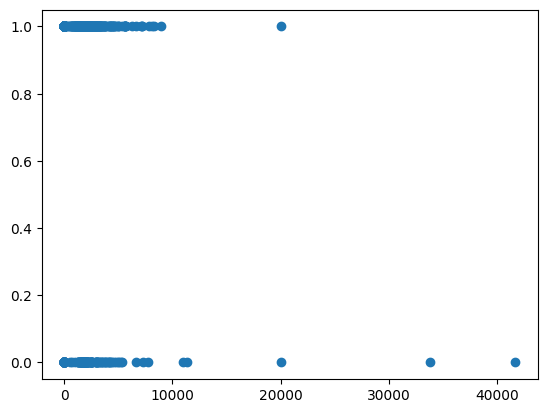

In [79]:
plt.scatter(df["CoapplicantIncome"],df["Loan_Status"])

In [83]:
df.groupby("Loan_Status").median()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,,
0,302.5,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,309.5,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


# I want separet my dataFrame in two data base test and trainning

In [93]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
X = fusion_data
y = target
for train,test in sss.split(X,y):
    X_train, X_test=X.iloc[train],X.iloc[test]
    y_train, y_test=y.iloc[train],y.iloc[test]
print('X_train heigth :', X_train.shape)
print('X_test heigth :', X_test.shape)
print('y_train heigth :', y_train.shape)
print('y_test heigth :', y_test.shape)

X_train heigth : (491, 13)
X_test heigth : (123, 13)
y_train heigth : (491,)
y_test heigth : (123,)


# We will applicate three logisticals algorithmics Regression, KNN, DecisionTree

In [106]:
model={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth = 1,random_state =42)
}
#function predict
def accu(y_true, y_pred, retu = False):
    acc = accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f"the prediction of this model is {acc}")
        
#function for application of models 
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train, y_train)
        accu(y_test,model.predict(X_test))
        print('-'*30)
train_test_eval(model,X_train,y_train,X_test,y_test)

LogisticRegression :
the prediction of this model is 1.0
------------------------------
KNeighborsClassifier :
the prediction of this model is 0.6097560975609756
------------------------------
DecisionTreeClassifier :
the prediction of this model is 1.0
------------------------------


C:\Users\mlkou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
X.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [113]:
X_2 = X[['Credit_History','Married','CoapplicantIncome']]

In [114]:
X_2

,Credit_History,Married,CoapplicantIncome
0,1.0,0,0.0
1,1.0,1,1508.0
2,1.0,1,0.0
3,1.0,1,2358.0
4,1.0,0,0.0
...,...,...,...
609,1.0,0,0.0
610,1.0,1,0.0
611,1.0,1,240.0
612,1.0,1,0.0


In [115]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
X = fusion_data
y = target
for train,test in sss.split(X_2,y):
    X_train, X_test=X_2.iloc[train],X_2.iloc[test]
    y_train, y_test=y.iloc[train],y.iloc[test]
print('X_train heigth :', X_train.shape)
print('X_test heigth :', X_test.shape)
print('y_train heigth :', y_train.shape)
print('y_test heigth :', y_test.shape)


X_train heigth : (491, 3)
X_test heigth : (123, 3)
y_train heigth : (491,)
y_test heigth : (123,)


In [116]:
train_test_eval(model,X_train,y_train,X_test,y_test)

LogisticRegression :
the prediction of this model is 0.8536585365853658
------------------------------
KNeighborsClassifier :
the prediction of this model is 0.6991869918699187
------------------------------
DecisionTreeClassifier :
the prediction of this model is 0.8455284552845529
------------------------------


# Apply just the model Regression logisticals on our dataBase

In [118]:
Classifier=LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression()

# Resgister my model


In [120]:
pickle.dump(Classifier,open('model.pkl','wb'))